In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import io

# Reading data
uploaded = files.upload()
concrete = pd.read_csv(io.StringIO(uploaded['concrete.csv'].decode('utf-8')))
concrete.head(5)

Saving concrete.csv to concrete (1).csv


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [0]:
def model_building(hidden_layer):
    
    model = Sequential()
    
    for i in range(1,len(hidden_layer)-1):
        if (i==1):
            model.add(Dense(hidden_layer[i],input_dim=hidden_layer[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_layer[i],activation="relu"))
    model.add(Dense(hidden_layer[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return model

columns = list(concrete.columns)
features = columns[0:8]
target = columns[8]

In [7]:
neuralnetwork_model = model_building([8,50,1])
neuralnetwork_model.fit(np.array(concrete[features]),np.array(concrete[target]),epochs=900)
predictions = neuralnetwork_model.predict(np.array(concrete[features]))
predictions = pd.Series([i[0] for i in predictions])
rmse_value = np.sqrt(np.mean((predictions-concrete[target])**2))

Epoch 1/900
1030/1030 [==============================] - 0s 89us/step - loss: 509.4355 - accuracy: 0.0000e+00
Epoch 2/900
1030/1030 [==============================] - 0s 34us/step - loss: 197.6954 - accuracy: 0.0000e+00
Epoch 3/900
1030/1030 [==============================] - 0s 34us/step - loss: 154.1269 - accuracy: 0.0000e+00
Epoch 4/900
1030/1030 [==============================] - 0s 39us/step - loss: 137.6203 - accuracy: 0.0000e+00
Epoch 5/900
1030/1030 [==============================] - 0s 36us/step - loss: 134.1362 - accuracy: 9.7087e-04
Epoch 6/900
1030/1030 [==============================] - 0s 36us/step - loss: 127.5971 - accuracy: 0.0000e+00
Epoch 7/900
1030/1030 [==============================] - 0s 36us/step - loss: 125.0453 - accuracy: 0.0000e+00
Epoch 8/900
1030/1030 [==============================] - 0s 37us/step - loss: 114.9776 - accuracy: 0.0000e+00
Epoch 9/900
1030/1030 [==============================] - 0s 38us/step - loss: 124.8413 - accuracy: 0.0000e+00
Epoch 10/9

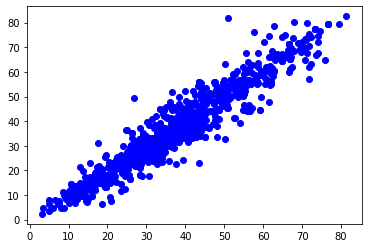

RMSE Value of Neural-Network Model:  4.985068911731223
Correlation Co-efficient Value between Predictions and Actual Values: 
  [[1.         0.95540485]
 [0.95540485 1.        ]]


In [8]:
plt.plot(predictions,concrete[target],"bo") #Plot shows a Linear line approximately at 45degrees concluding that the Predictions and Actual Values are very near to eachother
plt.show()
print("RMSE Value of Neural-Network Model: ",rmse_value) #Low-RMSE Value
print("Correlation Co-efficient Value between Predictions and Actual Values: \n ",np.corrcoef(predictions,concrete[target])) #High Correlation Co-efficient shows that the predictions and
# Actual Values are almost Similar to each other